<a href="https://colab.research.google.com/github/DommiiUdomp/water-station/blob/main/osmnx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas tqdm osmnx

In [3]:
import networkx as nx
import osmnx as ox

%matplotlib inline
ox.__version__

'0.11.4'

In [82]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
locations_to_show_on_map = ["University of Szeged"]
uni_location = gpd.tools.geocode(locations_to_show_on_map, provider='nominatim', user_agent="maksym demo")
print(uni_location)

                    geometry  \
0  POINT (20.14649 46.25005)   

                                             address  
0  Szegedi Tudományegyetem, 13, Dugonics tér, Bel...  


In [7]:
locations_to_show_on_map = ["Hungary"]
hu_location = gpd.tools.geocode(locations_to_show_on_map, provider='nominatim', user_agent="maksym demo")
print(hu_location)

                    geometry       address
0  POINT (19.50609 47.18176)  Magyarország


In [11]:
hu_location.geometry.x

0    19.506094
dtype: float64

In [14]:
hu_network = ox.gdf_from_place("Hungary")

/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/core.py:341: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed 

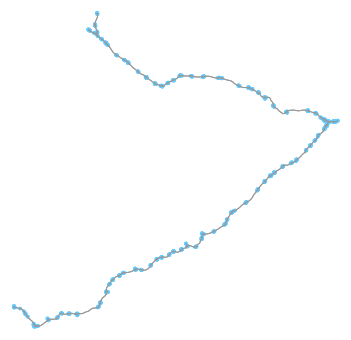

In [16]:
ox.config(use_cache=True, log_console=True)
G = ox.graph_from_place('Hungary', network_type='drive', custom_filter='["highway"~"motorway"]')
fig, ax = ox.plot_graph(G)

# ***Load Data HtmL***

In [48]:
hu_city = pd.read_html('https://en.wikipedia.org/wiki/List_of_cities_and_towns_of_Hungary')[0]

In [49]:
hu_city.columns

MultiIndex([(     'Unnamed: 0_level_0',      'Unnamed: 0_level_1'),
            (            'City / town',             'City / town'),
            (                 'County',                  'County'),
            (             'Population',             '1949 Census'),
            (             'Population',             '1990 Census'),
            (             'Population',             '2011 Census'),
            (             'Population',           '2021 Estimate'),
            (        'Peak population',         'Peak population'),
            ('Metropolitan area(2020)', 'Metropolitan area(2020)')],
           )

In [51]:
hu_city.columns = hu_city.columns.get_level_values(1)

In [ ]:
hu_city = hu_city.loc[:7]
hu_city.drop(columns='Unnamed: 0_level_1',inplace=True)

In [55]:
hu_city

,City / town,County,1949 Census,1990 Census,2011 Census,2021 Estimate,Peak population,Metropolitan area(2020)
0,Budapest,Budapest (Pest),1590316,2016681,1733685,1723836,"2,113,034 (1989)",3014944
1,Debrecen,Hajdú-Bihar,115399,212235,211340,200974,"217,706 (1994)",325326
2,Szeged,Csongrád-Csanád,104867,175301,168048,159074,"178,878 (1994)",242326
3,Miskolc,Borsod-Abaúj-Zemplén,109841,196442,167754,150695,"211,345 (1985)",283706
4,Pécs,Baranya,89470,170039,156049,140237,"172,177 (1994)",245194
5,Győr,Győr-Moson-Sopron,69583,129331,129527,132735,"133,946 (2020)",260024
6,Nyíregyháza,Szabolcs-Szatmár-Bereg,56334,114152,119746,116554,"119,746 (2011)",233623
7,Kecskemét,Bács-Kiskun,61730,102516,111411,109651,"112,233 (2010)",201156


In [101]:
hu_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   City / town              8 non-null      object
 1   County                   8 non-null      object
 2   1949 Census              8 non-null      object
 3   1990 Census              8 non-null      object
 4   2011 Census              8 non-null      object
 5   2021 Estimate            8 non-null      object
 6   Peak population          8 non-null      object
 7   Metropolitan area(2020)  8 non-null      object
dtypes: object(8)
memory usage: 640.0+ bytes


In [105]:
ox.gdf_from_place(hu_city['City / town'][1])

,geometry,place_name,bbox_north,bbox_south,bbox_east,bbox_west
0,POINT (21.62598 47.53140),"Debrecen, Debreceni járás, Hajdú-Bihar, Great ...",47.691399,47.371399,21.785978,21.465978


/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/core.py:341: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed 

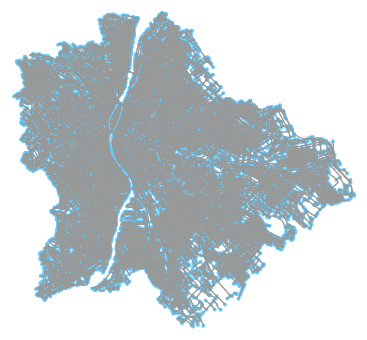

(<Figure size 693x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f16f46da510>)

In [111]:
G = ox.graph_from_place('Budapest, Hungary')
ox.plot_graph(G)

/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/core.py:341: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed 

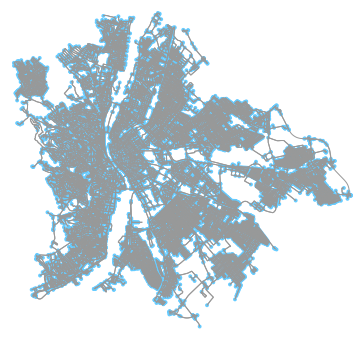

In [112]:
bu_road = ox.graph_from_place('Budapest, Hungary', network_type="drive")
fig, ax = ox.plot_graph(bu_road)

/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/core.py:341: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed 

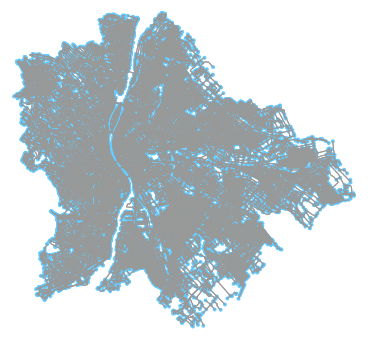

In [113]:
bu_walk = ox.graph_from_place('Budapest, Hungary', network_type="walk")
fig, ax = ox.plot_graph(bu_walk)

In [164]:
# save graph as a shapefile
ox.save_graph_shapefile(bu_walk, filename='graph', folder='/content', encoding='utf-8')

/usr/local/lib/python3.7/dist-packages/osmnx/save_load.py:98: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf_nodes.crs = G_save.graph['crs']
/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [165]:
!ls

cache  graph  sample_data


In [170]:
gpd = gpd.read_file('/content/graph/nodes/nodes.shp')
gpd.plot()

AttributeError: ignored

In [114]:
basic_stats = ox.basic_stats(bu_walk)
print(basic_stats['circuity_avg'])

1.0457239884316176


In [ ]:
extended_stats = ox.extended_stats(bu_walk, bc=True)
print(extended_stats['betweenness_centrality_avg'])

In [125]:
hs = gpd.tools.geocode(["Heroes' Square"], provider='nominatim', user_agent="maksym demo")
print(hs)

                    geometry  \
0  POINT (19.07775 47.51488)   

                                             address  
0  Hősök tere, Városliget, XIV. kerület, Budapest...  


In [127]:
h = gpd.tools.geocode(["Fisherman's Bastion"], provider='nominatim', user_agent="maksym demo")
print(h)

                    geometry  \
0  POINT (19.03471 47.50233)   

                                             address  
0  Halászbástya, Schulek Frigyes lépcső, Buda, Ví...  


In [132]:
bu3000 = ox.graph_from_address('Budapest, Hungary', distance=3000)

/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated an

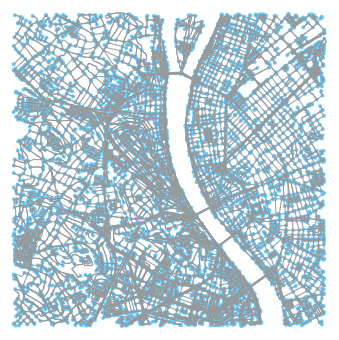

<Figure size 432x288 with 0 Axes>

In [171]:
fig, ax = ox.plot_graph(bu3000)

plt.savefig('bu.png')

In [134]:
bu_dis3000= ox.graph_to_gdfs(bu3000)

/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [136]:
bu_dis3000

(                    y          x       osmid highway  ref  \
 8398110720  47.476450  19.040667  8398110720     NaN  NaN   
 738033665   47.490258  19.046243   738033665     NaN  NaN   
 4762140672  47.508575  19.046384  4762140672     NaN  NaN   
 8398110723  47.476403  19.041061  8398110723     NaN  NaN   
 8398110724  47.476427  19.040916  8398110724     NaN  NaN   
 ...               ...        ...         ...     ...  ...   
 269189109   47.510032  19.029420   269189109     NaN  NaN   
 8647966715  47.500507  19.037129  8647966715     NaN  NaN   
 8647966716  47.500587  19.036993  8647966716     NaN  NaN   
 8398110718  47.486316  19.049935  8398110718     NaN  NaN   
 8398110719  47.476077  19.040869  8398110719     NaN  NaN   
 
                              geometry  
 8398110720  POINT (19.04067 47.47645)  
 738033665   POINT (19.04624 47.49026)  
 4762140672  POINT (19.04638 47.50857)  
 8398110723  POINT (19.04106 47.47640)  
 8398110724  POINT (19.04092 47.47643)  
 ...    

In [141]:
#orig, dest = (19.07775, 47.51488), (19.03471,47.50233)
orig = list(bu3000)[0]
dest = list(bu3000)[-1]
print(orig)

8398110720


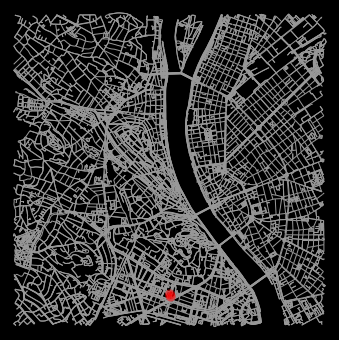

In [142]:
route = nx.shortest_path(bu3000, orig, dest)
fig, ax = ox.plot_graph_route(bu3000, route, route_linewidth=6, node_size=0, bgcolor='k')

In [146]:
# see mean speed/time values by road type
edges = ox.graph_to_gdfs(bu3000, nodes=False)
edges['highway'] = edges['highway'].astype(str)
edges.groupby('highway')[['length']].mean().round(1)

,length
highway,
"['corridor', 'steps']",36.8
"['cycleway', 'path']",90.4
"['cycleway', 'residential']",45.7
"['footway', 'bus_stop']",21.2
"['footway', 'corridor', 'steps']",49.0
"['footway', 'corridor']",38.6
"['footway', 'cycleway']",193.0
"['footway', 'path', 'steps']",46.6
"['footway', 'path']",50.7


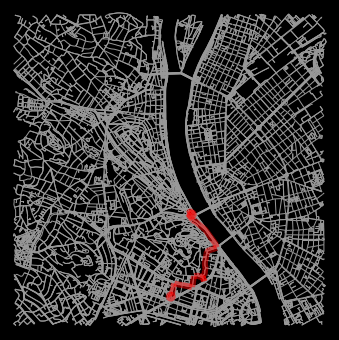

In [150]:
orig = list(bu3000)[1]
dest = list(bu3000)[-1]
route2 = nx.shortest_path(bu3000, orig, dest, weight='lenght')
fig, ax = ox.plot_graph_route(bu3000, route2, route_linewidth=6, node_size=0, bgcolor='k')

In [152]:
list(bu3000)[-2]

8398110718

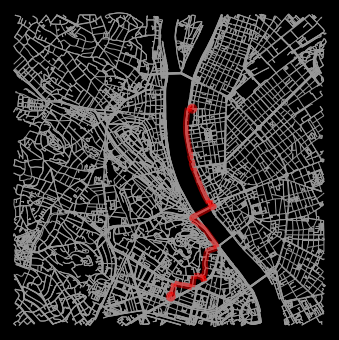

In [153]:
orig = list(bu3000)[2]
dest = list(bu3000)[-1]
route3 = nx.shortest_path(bu3000, orig, dest, weight='lenght')
fig, ax = ox.plot_graph_route(bu3000, route3, route_linewidth=6, node_size=0, bgcolor='k')

In [157]:
ox.get_route_edge_attributes(bu3000,route2)

[{'geometry': <shapely.geometry.linestring.LineString at 0x7f1783ee87d0>,
  'highway': 'footway',
  'length': 114.05999999999999,
  'oneway': False,
  'osmid': [59546846, 59546847]},
 {'highway': 'cycleway', 'length': 7.187, 'oneway': False, 'osmid': 59504944},
 {'geometry': <shapely.geometry.linestring.LineString at 0x7f1783ee8a50>,
  'highway': ['footway', 'steps'],
  'length': 33.485,
  'oneway': False,
  'osmid': [647427232, 274150768, 647427230, 647427231]},
 {'highway': 'secondary',
  'lanes': '4',
  'length': 44.056,
  'maxspeed': '50',
  'name': 'Krisztina körút',
  'oneway': True,
  'osmid': 287891664,
  'ref': '3'},
 {'geometry': <shapely.geometry.linestring.LineString at 0x7f16ff461b50>,
  'highway': 'secondary',
  'lanes': '2',
  'length': 103.73700000000001,
  'maxspeed': ['30', '50'],
  'name': 'Szent Gellért rakpart',
  'oneway': True,
  'osmid': [292642956, 56066399]},
 {'highway': 'footway', 'length': 5.198, 'oneway': False, 'osmid': 613560472},
 {'geometry': <shapely.

In [159]:
# compare the two routes
ox.get_unique_nodes_ordered_from_way
route2_length = int(sum(ox.get_route_edge_attributes(bu3000, route2, 'length')))
route3_length = int(sum(ox.get_route_edge_attributes(bu3000, route3, 'length')))
#route1_time = int(sum(ox.get_route_edge_attributes(bu3000, route2, 'travel_time')))
#route2_time = int(sum(ox.get_route_edge_attributes(bu3000, route3, 'travel_time')))
print('Route 2 is', route2_length, 'meters ')
print('Route 3 is', route3_length, 'meters ')

Route 2 is 2938 meters 
Route 3 is 5441 meters 


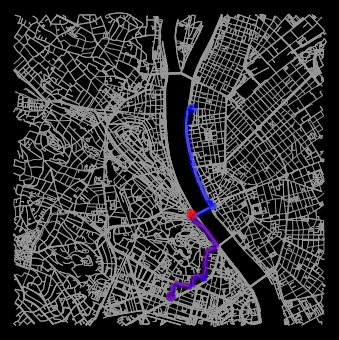

In [160]:
# pick route colors
c1 = 'r' #length
c2 = 'b' #travel_time
rc1 = [c1] * (len(route2) - 1)
rc2 = [c2] * (len(route3) - 1)
rc = rc1 + rc2
nc = [c1, c1, c2, c2]

# plot the routes
fig, ax = ox.plot_graph_routes(bu3000, [route2, route3], route_color=rc, route_linewidth=6,
                               orig_dest_node_color=nc, node_size=0, bgcolor='k')

In [173]:
fig.savefig('bu.png')

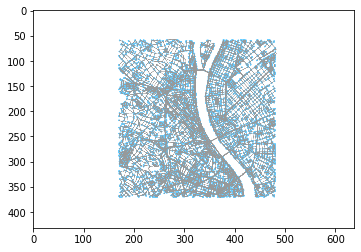

In [175]:
p = '/content/bu.png'

plt.imshow(plt.imread(p))